In [12]:
from google.colab import drive
drive.mount(r'/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!ls "/content/drive/MyDrive/datasets_DSA"

benign	malignant  normal


In [14]:
import cv2
import os

data_dir = r'/content/drive/MyDrive/datasets_DSA'  # Path to your dataset folder
class_labels = os.listdir(data_dir)  # Assuming subfolders are named after class labels

images = []
labels = []

for label_id, label in enumerate(class_labels):
    label_path = os.path.join(data_dir, label)
    for img_file in os.listdir(label_path):
        img_path = os.path.join(label_path, img_file)
        image = cv2.imread(img_path)
        images.append(image)
        labels.append(label_id)


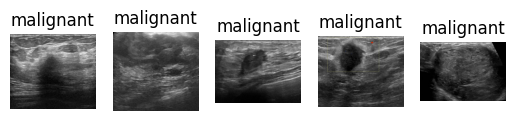

In [15]:
import matplotlib.pyplot as plt

# Display a few example images
num_images_to_display = 5

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(class_labels[labels[i]])
    plt.axis('off')

plt.show()


In [16]:
import cv2

target_size = (224, 224)  # Define your target image size

resized_images = []
for image in images:
    resized_image = cv2.resize(image, target_size)
    resized_images.append(resized_image)
rescaled_images = [image / 255.0 for image in resized_images]


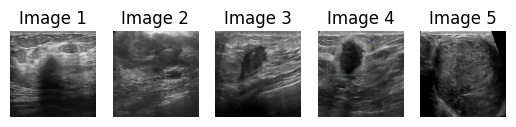

In [17]:
import matplotlib.pyplot as plt

# Choose the number of images you want to display
num_images_to_display = 5

# Display the selected images
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(rescaled_images[i])
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.show()


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and the combined validation/testing (30%)
train_images, val_test_images, train_labels, val_test_labels = train_test_split(
    rescaled_images, labels, test_size=0.3, random_state=42)

# Further split the combined validation/testing set into separate validation (50%) and testing (50%) sets
val_images, test_images, val_labels, test_labels = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42)
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert the images and labels to NumPy arrays
train_images = np.array(train_images)
val_images = np.array(val_images)

# One-hot encode the labels if not already done
train_labels = to_categorical(train_labels, num_classes=3)  # Assuming you have 3 classes
val_labels = to_categorical(val_labels, num_classes=3)

# Now, you can train the model
#history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))



In [19]:
# Define the model architecture
from tensorflow.keras import models,layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units as per your number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Assuming one-hot encoded labels
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
28/28 [==============================] - 95s 3s/step - loss: 0.7753 - accuracy: 0.7183 - val_loss: 0.5889 - val_accuracy: 0.8360
Epoch 2/10
28/28 [==============================] - 95s 3s/step - loss: 0.5028 - accuracy: 0.8247 - val_loss: 0.4297 - val_accuracy: 0.8254
Epoch 3/10
28/28 [==============================] - 96s 3s/step - loss: 0.3735 - accuracy: 0.8552 - val_loss: 0.4193 - val_accuracy: 0.8360
Epoch 4/10
28/28 [==============================] - 89s 3s/step - loss: 0.2501 - accuracy: 0.9005 - val_loss: 0.4217 - val_accuracy: 0.8624
Epoch 5/10
28/28 [==============================] - 89s 3s/step - loss: 0.1485 - accuracy: 0.9400 - val_loss: 0.5084 - val_accuracy: 0.8360
Epoch 6/10
28/28 [==============================] - 95s 3s/step - loss: 0.0975 - accuracy: 0.9649 - val_loss: 0.4504 - val_accuracy: 0.8730
Epoch 7/10
28/28 [==============================] - 95s 3s/step - loss: 0.0857 - accuracy: 0.9774 - val_loss: 0.6218 - val_accuracy: 0.8254
Epoch 8/10
28/28 [==